In [2]:
a = 30
b = 20
c = 10
d = 5

print((a + b) * (c / d))
print(a + (b * c) / d)

100.0
70.0


In [1]:
100%10

0

In [1]:
fruits = {'Apple','Orange','Tomato','Cucumber','Watermelon'}
vegetables={'Cucumber','Tomato','Cauliflower','Potato'}

fruitsXORvegs1 = fruits.difference(vegetables)

print(fruitsXORvegs1)

{'Orange', 'Apple', 'Watermelon'}


In [27]:
list1=["one","two","three"]
list2=["one","two","three"]

print(list1 is list2)
print(list1 == list2)

dic1 = dict(zip(list1, list2))
dic1['four'] = 'four'
print(dic1)

import random
print(random.sample(list1,2))

False
True
{'one': 'one', 'two': 'two', 'three': 'three', 'four': 'four'}
['one', 'three']


In [14]:
ls = "my name is nirma"
ls1 = ls.replace('name','nirma')
ls1

'my nirma is nirma'

In [22]:
print("{\\}")

{\}


In [38]:
lst = [3, 1, 5, 2, 4]
sho = []

for i in range(len(lst)):
    min = i
    for j in range(i+1, len(lst)):
        if lst[j] < lst[min]:
            min = j
    sho.append(lst[min])
    lst[i], lst[min] = lst[min], lst[i]
print(sho)

[1, 2, 3, 4, 5]


In [5]:
import numpy as np

# Your vectors
data = np.array([
    [150, 200, 2.8, 450],
    [168, 156, 3.3, 200],
    [158, 179, 3.2, 390],
    [300, 400, 2.5, 19]
])

# Number of samples
n = data.shape[0]

# Create empty dissimilarity matrix
dissimilarity_matrix = np.zeros((n, n))

# Compute Euclidean distances
for i in range(n):
    for j in range(n):
        dissimilarity_matrix[i][j] = np.linalg.norm(data[i] - data[j])

print("Dissimilarity Matrix:\n", dissimilarity_matrix)

# Find the most dissimilar pair
max_distance = np.max(dissimilarity_matrix)
indices = np.where(dissimilarity_matrix == max_distance)
print("\nMost dissimilar samples:", indices[0][0]+1, "and", indices[1][0]+1)
print("Max distance:", max_distance)


Dissimilarity Matrix:
 [[  0.         254.48035288  64.07152254 498.25805563]
 [254.48035288   0.         191.64814113 331.24256973]
 [ 64.07152254 191.64814113   0.         454.58386465]
 [498.25805563 331.24256973 454.58386465   0.        ]]

Most dissimilar samples: 1 and 4
Max distance: 498.25805562981117


In [ ]:
import random

num = 179
lst_d = range(2, num - 1, 1)
lst_d = list(lst_d)
a = 1

while (a != 0 or len(lst_d) == 0):
    r_d = random.choice(lst_d)
    a = num % r_d
    lst_d.pop(lst_d.index(r_d))

if len(lst_d) == 0:
    print("Number is prime")
else:
    print("Number is non - prime")


IndexError: Cannot choose from an empty sequence

In [ ]:
import math, random

def pollards_rho(n):
    """Find a non-trivial factor of n using Pollard's Rho."""
    if n % 2 == 0:
        return 2
    x = random.randrange(2, n - 1)
    y = x
    c = random.randrange(1, n - 1)
    d = 1
    while d == 1:
        x = (x*x + c) % n
        y = (y*y + c) % n
        y = (y*y + c) % n
        d = math.gcd(abs(x - y), n)
        if d == n:
            return pollards_rho(n)
    return d

def two_prime_factors_pollard(n):
    f = pollards_rho(n)
    return f, n // f

# Example usage:
p = 9999999967
q = 9999999943

num = p*q #10403
print(two_prime_factors_pollard(numl))  # Output: (101, 103)


In [1]:
import sys

# Remove the digit limit (set to 0 for unlimited)
sys.set_int_max_str_digits(0)

# Now you can handle huge ints
numl = 2 ** 136279841 - 1  # no commas  # Mersenne
s = str(numl)
print(f"{s[:20]} ... {s[-20:]} (total digits: {len(s)})")  # This will now work


88169432750383326555 ... 55076706219486871551 (total digits: 41024320)


✅ Simulation Completed. Results in gate_summary.csv and plots saved as PNGs.


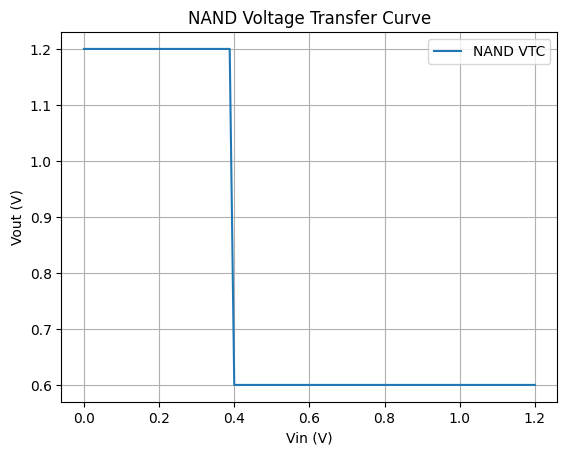

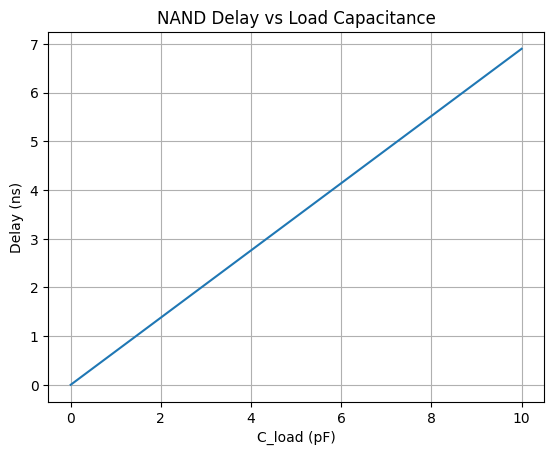

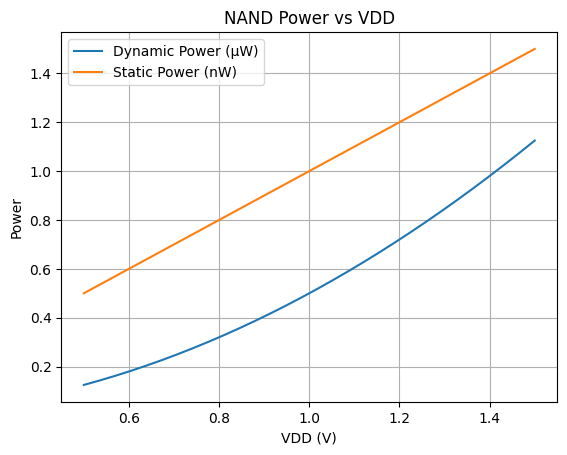

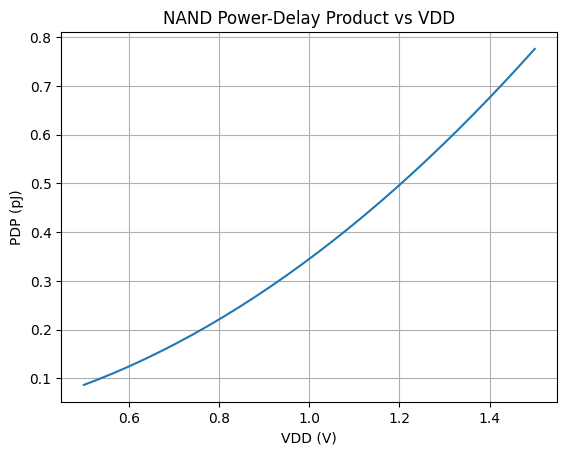

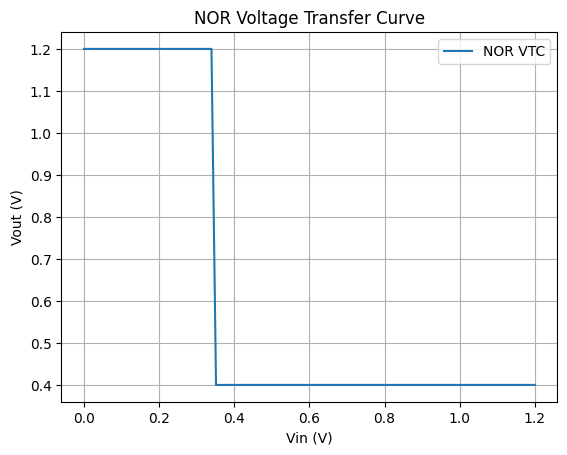

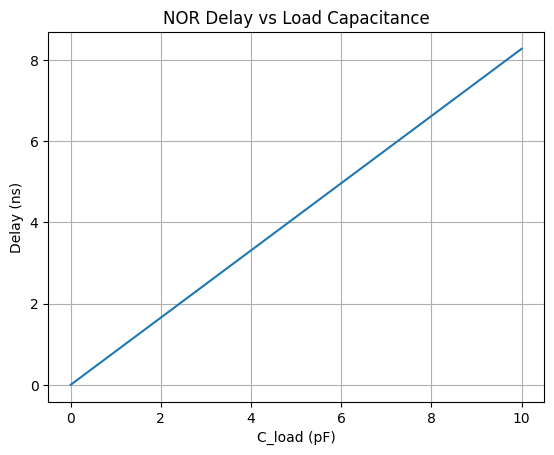

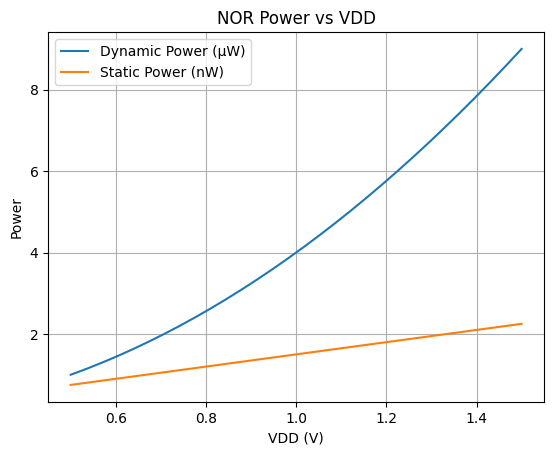

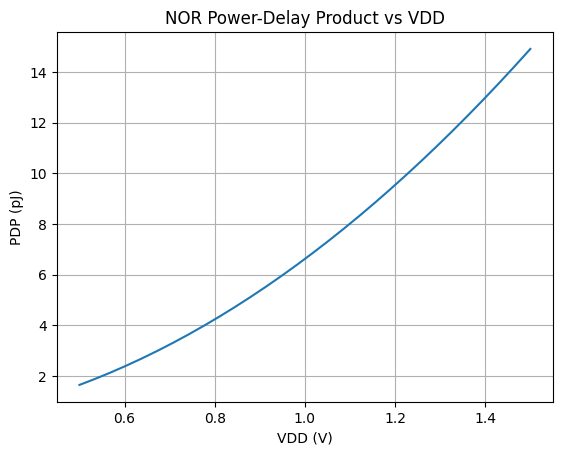

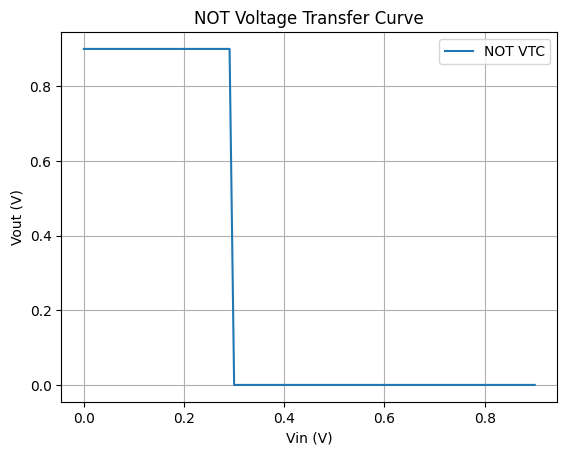

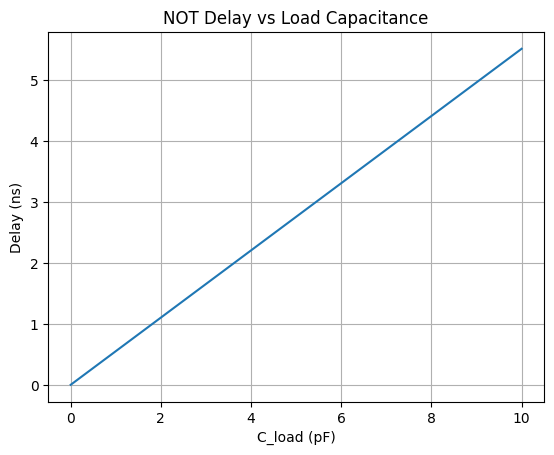

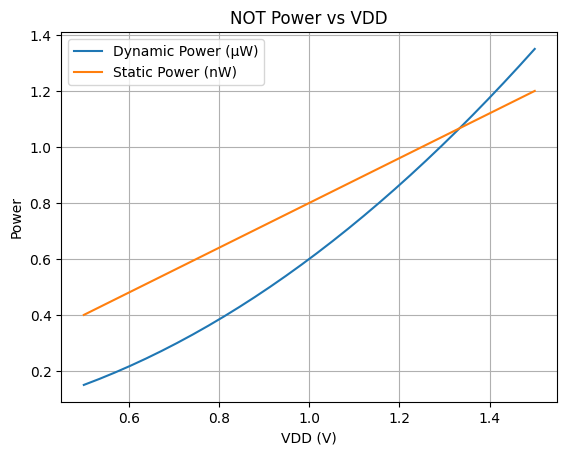

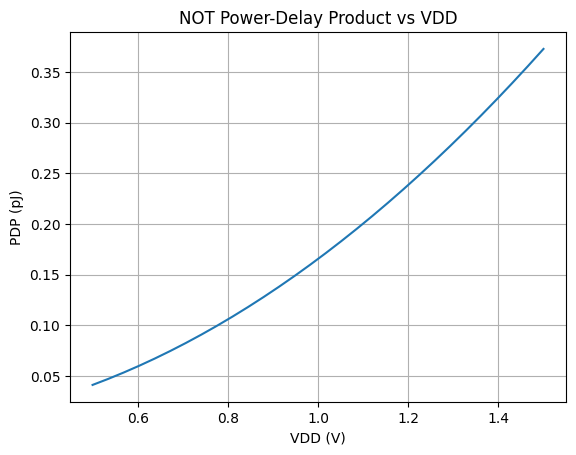

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------
# Custom Exception
# ------------------------
class GateError(Exception):
    pass

# ------------------------
# Base Gate Class
# ------------------------
class Gate:
    def __init__(self, VDD, Vth, C_load, f, alpha, R_on, Ileak):
        if VDD <= 0 or Vth <= 0 or C_load <= 0:
            raise GateError("Invalid parameters for gate initialization")
        self.VDD = VDD
        self.Vth = Vth
        self.C_load = C_load
        self.f = f
        self.alpha = alpha
        self.R_on = R_on
        self.Ileak = Ileak

    def vtc_curve(self, points=100):
        Vin = np.linspace(0, self.VDD, points)
        Vout = np.where(Vin < self.Vth, self.VDD, 0)  # inverter-like
        return Vin, Vout

    def delay(self, C_load=None):
        if C_load is None:
            C_load = self.C_load
        return 0.69 * self.R_on * C_load

    def dynamic_power(self, VDD=None, C_load=None, f=None):
        VDD = self.VDD if VDD is None else VDD
        C_load = self.C_load if C_load is None else C_load
        f = self.f if f is None else f
        return self.alpha * C_load * (VDD**2) * f

    def static_power(self, VDD=None):
        VDD = self.VDD if VDD is None else VDD
        return self.Ileak * VDD

# ------------------------
# Derived Gate Classes
# ------------------------
class NOTGate(Gate):
    pass

class NANDGate(Gate):
    def vtc_curve(self, points=100):
        Vin = np.linspace(0, self.VDD, points)
        Vout = np.where(Vin < self.Vth, self.VDD, self.VDD/2)
        return Vin, Vout

class NORGate(Gate):
    def vtc_curve(self, points=100):
        Vin = np.linspace(0, self.VDD, points)
        Vout = np.where(Vin < self.Vth, self.VDD, self.VDD/3)
        return Vin, Vout

class XNORGate(Gate):
    def vtc_curve(self, points=100):
        Vin = np.linspace(0, self.VDD, points)
        Vout = np.where((Vin < self.Vth) | (Vin > self.VDD-self.Vth), self.VDD, 0)
        return Vin, Vout

# ------------------------
# Gate Factory
# ------------------------
def create_gate(gate_type, **params):
    gate_type = gate_type.upper().strip()
    if gate_type == "NOT":
        return NOTGate(**params)
    elif gate_type == "NAND":
        return NANDGate(**params)
    elif gate_type == "NOR":
        return NORGate(**params)
    elif gate_type == "XNOR":
        return XNORGate(**params)
    else:
        raise GateError(f"Unknown gate type: {gate_type}")

# ------------------------
# Main Simulation
# ------------------------
if __name__ == "__main__":
    try:
        df = pd.read_csv("foundry_parameters.csv")
        df.columns = df.columns.str.strip()  # clean headers

        results = []

        for _, row in df.iterrows():
            gate = create_gate(
                row["GateType"],
                VDD=float(row["VDD"]),
                Vth=float(row["Vth"]),
                C_load=float(row["C_load"]),
                f=float(row["f"]),
                alpha=float(row["alpha"]),
                R_on=float(row["R_on"]),
                Ileak=float(row["Ileak"])
            )

            # ---------------- VTC Curve ----------------
            Vin, Vout = gate.vtc_curve()
            plt.figure()
            plt.plot(Vin, Vout, label=f"{row['GateType']} VTC")
            plt.xlabel("Vin (V)")
            plt.ylabel("Vout (V)")
            plt.title(f"{row['GateType']} Voltage Transfer Curve")
            plt.grid(True)
            plt.legend()
            plt.savefig(f"{row['GateType']}_VTC.png")

            # ---------------- Delay vs C_load ----------------
            C_sweep = np.logspace(-15, -11, 30)  # 1 fF → 10 pF
            delays = [gate.delay(C) * 1e9 for C in C_sweep]
            plt.figure()
            plt.plot(C_sweep*1e12, delays)
            plt.xlabel("C_load (pF)")
            plt.ylabel("Delay (ns)")
            plt.title(f"{row['GateType']} Delay vs Load Capacitance")
            plt.grid(True)
            plt.savefig(f"{row['GateType']}_Delay_vs_C.png")

            # ---------------- Power vs VDD ----------------
            VDD_sweep = np.linspace(0.5, 1.5, 30)
            dyn_power = [gate.dynamic_power(VDD=v) * 1e6 for v in VDD_sweep]
            stat_power = [gate.static_power(VDD=v) * 1e9 for v in VDD_sweep]

            plt.figure()
            plt.plot(VDD_sweep, dyn_power, label="Dynamic Power (µW)")
            plt.plot(VDD_sweep, stat_power, label="Static Power (nW)")
            plt.xlabel("VDD (V)")
            plt.ylabel("Power")
            plt.title(f"{row['GateType']} Power vs VDD")
            plt.legend()
            plt.grid(True)
            plt.savefig(f"{row['GateType']}_Power_vs_VDD.png")

            # ---------------- PDP vs VDD ----------------
            delays_sweep = [gate.delay() * 1e9 for _ in VDD_sweep]  # assume R_on constant
            pdp = np.array(dyn_power) * np.array(delays_sweep)

            plt.figure()
            plt.plot(VDD_sweep, pdp)
            plt.xlabel("VDD (V)")
            plt.ylabel("PDP (pJ)")
            plt.title(f"{row['GateType']} Power-Delay Product vs VDD")
            plt.grid(True)
            plt.savefig(f"{row['GateType']}_PDP_vs_VDD.png")

            # ---------------- Save Summary ----------------
            results.append({
                "GateType": row["GateType"],
                "VDD": row["VDD"],
                "Delay (ns)": gate.delay() * 1e9,
                "Pdyn (µW)": gate.dynamic_power() * 1e6,
                "Pstatic (nW)": gate.static_power() * 1e9,
                "PDP (pJ)": (gate.dynamic_power() * 1e12) * (gate.delay())
            })

        # Save CSV Summary
        results_df = pd.DataFrame(results)
        results_df.to_csv("gate_summary.csv", index=False)
        print("✅ Simulation Completed. Results in gate_summary.csv and plots saved as PNGs.")

    except GateError as e:
        print("Gate Error:", e)
    except Exception as e:
        print("Unexpected Error:", e)


In [10]:
import re

def parse_rul_file(filepath):
    """
    Parse a Microwind .rul file and return a nested dictionary:
    {
      "GLOBAL": { "lambda": 0.06, "metalLayers": 6, ... },
      "NMOS": { "l3vto": 0.4, "b4vtho": 0.4, ... },
      "PMOS": { "l3vto": -0.45, "b4vtho": 0.45, ... }
    }
    """
    data = {"GLOBAL": {}, "NMOS": {}, "PMOS": {}}
    current_section = "GLOBAL"

    with open(filepath, "r") as f:
        for line in f:
            line = line.strip()
            # skip empty lines or comments
            if not line or line.startswith("*"):
                continue

            # detect MOS section headers
            if line.startswith("NMOS"):
                current_section = "NMOS"
                continue
            if line.startswith("PMOS"):
                current_section = "PMOS"
                continue

            # extract "key = value"
            if "=" in line:
                parts = line.split("=")
                key = parts[0].strip()
                # value may have a number + comment
                value_str = re.split(r"[ \t(]", parts[1].strip())[0]
                try:
                    value = float(value_str)
                except ValueError:
                    value = value_str
                data[current_section][key] = value

    return data


# ✅ Example usage
params = parse_rul_file("D:/Microwin Demo/MICROWIND - DEMO/MICROWIND - DEMO/mw03/cmos012.rul")

print("Global keys:", list(params["GLOBAL"].keys())[:10])
print("NMOS params:", {k: params["NMOS"][k] for k in list(params["NMOS"].keys())[:5]})
print("PMOS params:", {k: params["PMOS"][k] for k in list(params["PMOS"].keys())[:5]})


Global keys: ['lambda', 'metalLayers', 'edram', 'salicide', 'lowK', 'gateK', 'r101', 'r102', 'r201', 'r202']
NMOS params: {'l3vto': 0.4, 'l3u0': 0.06, 'l3tox': 2e-09, 'l3vmax': 120000.0, 'l3gamma': 0.4}
PMOS params: {'l3vto': -0.45, 'l3u0': 0.02, 'l3tox': 2e-09, 'l3vmax': 110000.0, 'l3gamma': 0.4}


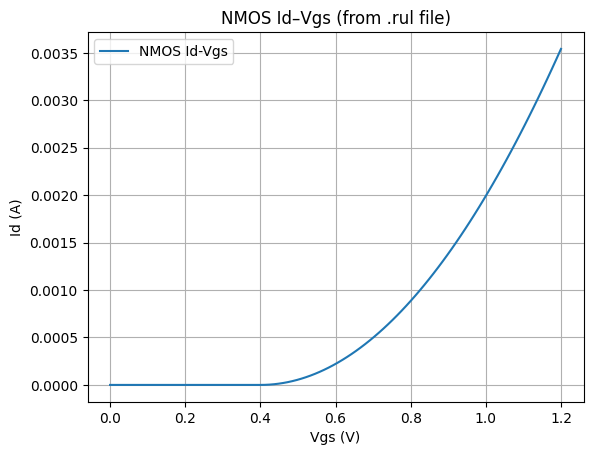

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load parameters
params = parse_rul_file("D:/Microwin Demo/MICROWIND - DEMO/MICROWIND - DEMO/mw03/cmos012.rul")
nmos = params["NMOS"]
pmos = params["PMOS"]
VDD = params["GLOBAL"].get("vdd", 1.2)

# constants
eps0 = 8.854e-12
Cox = (eps0 * params["GLOBAL"].get("gateK", 3.9)) / nmos["l3tox"]

def Id_nmos(Vgs, Vds, W=1e-6, L=0.12e-6):
    mu = nmos["l3u0"]
    Vth = nmos["l3vto"]
    if Vgs < Vth:
        return 0
    elif Vds < (Vgs - Vth):
        return mu*Cox*(W/L)*((Vgs-Vth)*Vds - 0.5*Vds**2)
    else:
        return 0.5*mu*Cox*(W/L)*(Vgs-Vth)**2

Vgs_vals = np.linspace(0, VDD, 100)
Id_vals = [Id_nmos(vgs, VDD) for vgs in Vgs_vals]

plt.plot(Vgs_vals, Id_vals, label="NMOS Id-Vgs")
plt.xlabel("Vgs (V)")
plt.ylabel("Id (A)")
plt.title("NMOS Id–Vgs (from .rul file)")
plt.grid(True)
plt.legend()
plt.show()


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# ---- Device Models ----
class MOSFET:
    def __init__(self, mu, Vth, Cox, W=1e-6, L=0.12e-6):
        self.mu = mu
        self.Vth = Vth
        self.Cox = Cox
        self.W = W
        self.L = L

    def Id(self, Vgs, Vds):
        """Shichman-Hodges MOSFET Id-Vgs-Vds model"""
        if Vgs <= self.Vth:
            return 0
        beta = self.mu * self.Cox * (self.W / self.L)
        Vov = Vgs - self.Vth
        if Vds < Vov:
            return beta * (Vov * Vds - 0.5 * Vds**2)  # Linear region
        else:
            return 0.5 * beta * Vov**2                # Saturation


class NMOS(MOSFET):
    pass  # same as MOSFET


class PMOS(MOSFET):
    def Id(self, Vsg, Vsd):
        """PMOS current (mirrored version, positive Id means pull-up current)"""
        return super().Id(Vsg, Vsd)


In [15]:
def inverter_vout(vin, VDD, nmos, pmos):
    """Solve for Vout where NMOS current ≈ PMOS current"""
    vout_vals = np.linspace(0, VDD, 200)
    for vout in vout_vals:
        Id_n = nmos.Id(Vgs=vin, Vds=vout)               # NMOS sink
        Id_p = pmos.Id(Vsg=VDD-vin, Vsd=VDD-vout)       # PMOS source
        if abs(Id_n - Id_p) < 1e-8:
            return vout
    return 0 if vin < nmos.Vth else VDD


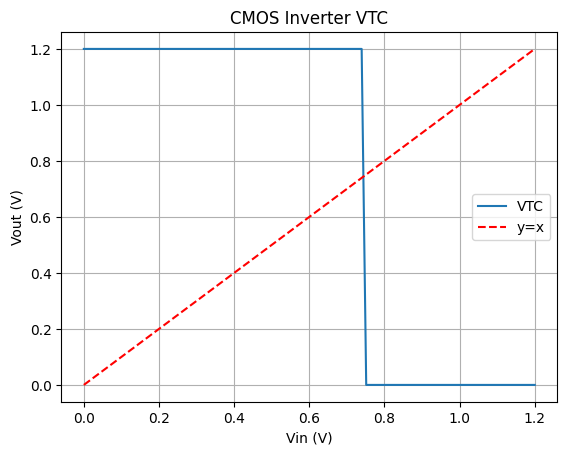

In [16]:
# Example parameters (replace with parsed .rul values)
VDD = 1.2
mu_n, Vth_n = 0.05, 0.4   # NMOS mobility, Vth
mu_p, Vth_p = 0.02, -0.45 # PMOS mobility, Vth (negative)

tox = 2.5e-9
eps_ox = 3.9 * 8.85e-12
Cox = eps_ox / tox

nmos = NMOS(mu=mu_n, Vth=Vth_n, Cox=Cox)
pmos = PMOS(mu=mu_p, Vth=abs(Vth_p), Cox=Cox)

Vins = np.linspace(0, VDD, 100)
Vouts = [inverter_vout(vin, VDD, nmos, pmos) for vin in Vins]

plt.plot(Vins, Vouts, label="VTC")
plt.plot(Vins, Vins, 'r--', label="y=x")
plt.xlabel("Vin (V)")
plt.ylabel("Vout (V)")
plt.title("CMOS Inverter VTC")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
# vlsi_analyzer.py
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------------
# Exceptions
# ---------------------
class RulParseError(Exception):
    pass

class GateError(Exception):
    pass

# ---------------------
# .rul Parser
# ---------------------
def parse_rul_file(filepath):
    data = {"GLOBAL": {}, "NMOS": {}, "PMOS": {}}
    current = "GLOBAL"
    with open(filepath, "r") as f:
        for raw in f:
            line = raw.strip()
            if not line or line.startswith("*"):
                continue
            # change section if 'NMOS' / 'PMOS' line occurs alone
            if line == "NMOS":
                current = "NMOS"
                continue
            if line == "PMOS":
                current = "PMOS"
                continue
            if "=" in line:
                left, right = line.split("=", 1)
                key = left.strip()
                # value may have trailing comment or parentheses
                value_str = re.split(r"[ \t(]", right.strip())[0]
                try:
                    value = float(value_str)
                except:
                    value = value_str
                data[current][key] = value
    return data

# ---------------------
# MOS device model (Shichman-Hodges / square law)
# ---------------------
class MOSFET:
    def __init__(self, mu, Vth, Cox, W=1e-6, L=0.12e-6, name="MOS"):
        # mu [m^2/Vs], Cox [F/m^2], W/L in meters
        self.mu = mu
        self.Vth = Vth
        self.Cox = Cox
        self.W = W
        self.L = L
        self.name = name

    def beta(self):
        return self.mu * self.Cox * (self.W / self.L)  # A/V^2

    def Id(self, Vgs, Vds):
        """Return drain current (A). For PMOS, feed positive Vsg,Vsd and use same model."""
        # small threshold handling
        if Vgs <= self.Vth:
            return 0.0
        beta = self.beta()
        Vov = Vgs - self.Vth
        if Vds < Vov:
            # linear region
            return beta * (Vov * Vds - 0.5 * Vds * Vds)
        else:
            # saturation
            return 0.5 * beta * Vov * Vov

# ---------------------
# Gate base and specific gates (NOT, NAND2, NOR2)
# ---------------------
class GateBase:
    def __init__(self, name, VDD, nmos: MOSFET, pmos: MOSFET, C_load=1e-12, f=1e6, alpha=0.5, Ileak=1e-12):
        self.name = name
        self.VDD = VDD
        self.nmos = nmos
        self.pmos = pmos
        self.C_load = C_load
        self.f = f
        self.alpha = alpha
        self.Ileak = Ileak

    def vtc(self, points=200):
        Vin_vals = np.linspace(0, self.VDD, points)
        Vout_vals = np.array([self._solve_vout_for_vin(vin) for vin in Vin_vals])
        return Vin_vals, Vout_vals

    def _solve_vout_for_vin(self, vin, tol=1e-9, maxiter=60):
        """
        Solve for Vout by finding root of f(vout) = Id_nmos - Id_pmos
        Uses bisection on [0, VDD]. If sign doesn't change, returns endpoint approximation.
        """
        a, b = 0.0, self.VDD
        def f(vout):
            Idn = self._Idn_for_gate(vin, vout)
            Idp = self._Idp_for_gate(vin, vout)
            return Idn - Idp

        fa, fb = f(a), f(b)
        if abs(fa) < tol:
            return a
        if abs(fb) < tol:
            return b
        # If sign change, bisection
        if fa * fb <= 0.0:
            low, high = a, b
            flow, fhigh = fa, fb
            for _ in range(maxiter):
                mid = 0.5 * (low + high)
                fmid = f(mid)
                if abs(fmid) < tol:
                    return mid
                if flow * fmid <= 0:
                    high = mid
                    fhigh = fmid
                else:
                    low = mid
                    flow = fmid
            return 0.5 * (low + high)
        # otherwise fallback: choose point where magnitude minimal (scan)
        v_grid = np.linspace(a, b, 201)
        fvals = np.array([abs(f(v)) for v in v_grid])
        vbest = v_grid[np.argmin(fvals)]
        return float(vbest)

    # Methods below should be overridden for multi-input gates, but default treats as inverter
    def _Idn_for_gate(self, vin, vout):
        # NMOS: Vgs = vin, Vds = vout
        return self.nmos.Id(Vgs=vin, Vds=vout)

    def _Idp_for_gate(self, vin, vout):
        # PMOS: use Vsg = VDD - vin, Vsd = VDD - vout
        return self.pmos.Id(Vgs=(self.VDD - vin), Vds=(self.VDD - vout))

    def delay(self, Cload=None):
        """Estimate propagation delay: t_pd = 0.69 * R_eq * Cload.
        R_eq approximated as VDD / Ion_on where Ion_on is current when input = VDD (pull-down) or 0 (pull-up).
        We'll compute propagation using pull-down (worst-case)."""
        C = self.C_load if Cload is None else Cload
        Ion = self._estimate_Ion()
        if Ion <= 0:
            return np.inf
        Req = self.VDD / Ion
        return 0.69 * Req * C

    def _estimate_Ion(self):
        """Estimate on current for pull-down (NMOS network when input(s) = VDD)"""
        # Default: inverter Ion = Id_nmos at Vgs=VDD, Vds=VDD
        return self._Idn_for_gate(self.VDD, 0.0) + 1e-18  # avoid zero

    def dynamic_power(self, Vdd=None, Cload=None, f=None):
        Vdd = self.VDD if Vdd is None else Vdd
        C = self.C_load if Cload is None else Cload
        fr = self.f if f is None else f
        return self.alpha * C * (Vdd**2) * fr

    def static_power(self, Vdd=None):
        Vdd = self.VDD if Vdd is None else Vdd
        return self.Ileak * Vdd

# ---------------------
# Inverter (NOT)
# ---------------------
class Inverter(GateBase):
    pass  # default GateBase behavior is inverter

# ---------------------
# NAND2 (2-input) and NOR2 (2-input)
# Simplified composition model:
# - NMOS series: W_eff = W / N_series
# - PMOS parallel: W_eff = W * N_parallel
# (For NOR, reverse: NMOS parallel, PMOS series)
# ---------------------
class NAND2(GateBase):
    def __init__(self, name, VDD, nmos_template: MOSFET, pmos_template: MOSFET,
                 C_load=1e-12, f=1e6, alpha=0.5, Ileak=1e-12, W_unit=None):
        # choose W_unit to be template W (if not specified)
        W_unit = nmos_template.W if W_unit is None else W_unit
        # For NAND2 assume both inputs drive similar sized transistors
        # Series NMOS count = 2 -> W_eff_n = W_unit / 2
        nmos_eff = MOSFET(mu=nmos_template.mu, Vth=nmos_template.Vth, Cox=nmos_template.Cox,
                          W=W_unit/2.0, L=nmos_template.L, name="NAND2_NMOS_eff")
        # PMOS parallel count = 2 -> W_eff_p = W_unit * 2
        pmos_eff = MOSFET(mu=pmos_template.mu, Vth=pmos_template.Vth, Cox=pmos_template.Cox,
                          W= W_unit*2.0, L=pmos_template.L, name="NAND2_PMOS_eff")
        super().__init__(name, VDD, nmos_eff, pmos_eff, C_load, f, alpha, Ileak)

    def _Idn_for_gate(self, vin, vout):
        # For VTC we must consider both inputs A and B. We'll approximate by using worst-case:
        # worst-case pull-down when both inputs = vin (i.e., parallel? no series), but here we approximate
        # For VTC curve we will consider one input switching, the other tied high (logical '1') or low depending slice.
        # To produce standard VTC slice, we assume other input = vin (worst-case).
        # So NMOS in series: W reduced already: use Id formula with Vgs=vin, Vds=vout
        return self.nmos.Id(Vgs=vin, Vds=vout)

    def _Idp_for_gate(self, vin, vout):
        # PMOS parallel -> stronger pull-up; using effective pmos object
        return self.pmos.Id(Vgs=(self.VDD - vin), Vds=(self.VDD - vout))

class NOR2(GateBase):
    def __init__(self, name, VDD, nmos_template: MOSFET, pmos_template: MOSFET,
                 C_load=1e-12, f=1e6, alpha=0.5, Ileak=1e-12, W_unit=None):
        W_unit = nmos_template.W if W_unit is None else W_unit
        # NMOS parallel: W_eff_n = W_unit * 2
        nmos_eff = MOSFET(mu=nmos_template.mu, Vth=nmos_template.Vth, Cox=nmos_template.Cox,
                          W= W_unit*2.0, L=nmos_template.L, name="NOR2_NMOS_eff")
        # PMOS series: W_eff_p = W_unit / 2
        pmos_eff = MOSFET(mu=pmos_template.mu, Vth=pmos_template.Vth, Cox=pmos_template.Cox,
                          W=W_unit/2.0, L=pmos_template.L, name="NOR2_PMOS_eff")
        super().__init__(name, VDD, nmos_eff, pmos_eff, C_load, f, alpha, Ileak)

    def _Idn_for_gate(self, vin, vout):
        # NMOS parallel approximation: stronger pull-down
        return self.nmos.Id(Vgs=vin, Vds=vout)

    def _Idp_for_gate(self, vin, vout):
        # PMOS series approximation: weaker pull-up
        return self.pmos.Id(Vgs=(self.VDD - vin), Vds=(self.VDD - vout))

# ---------------------
# Utility: plotting and sweeps
# ---------------------
def sweep_and_plot_gate(gate: GateBase, outfolder="results", save_plots=True):
    Path(outfolder).mkdir(parents=True, exist_ok=True)
    name = gate.name

    # 1) VTC
    Vin, Vout = gate.vtc(points=201)
    plt.figure()
    plt.plot(Vin, Vout, label=f"{name} VTC")
    plt.plot(Vin, Vin, 'r--', label="y=x")
    plt.xlabel("Vin (V)")
    plt.ylabel("Vout (V)")
    plt.title(f"{name} - VTC")
    plt.grid(True)
    plt.legend()
    if save_plots:
        plt.savefig(Path(outfolder) / f"{name}_VTC.png", dpi=200)
    plt.close()

    # 2) Delay vs Cload
    C_sweep = np.logspace(-15, -11, 30)  # 1 fF to 10 pF
    delays_ns = []
    for C in C_sweep:
        d = gate.delay(Cload=C)
        delays_ns.append(d * 1e9 if np.isfinite(d) else np.nan)
    plt.figure()
    plt.semilogx(C_sweep * 1e12, delays_ns, marker='o')
    plt.xlabel("C_load (pF)")
    plt.ylabel("Delay (ns)")
    plt.title(f"{name} - Delay vs C_load")
    plt.grid(True)
    if save_plots:
        plt.savefig(Path(outfolder) / f"{name}_Delay_vs_C.png", dpi=200)
    plt.close()

    # 3) Power vs VDD and PDP
    VDD_sweep = np.linspace(max(0.4, gate.VDD*0.5), gate.VDD*1.5, 30)
    dyn_power_uW = []
    stat_power_nW = []
    pdp_pJ = []
    for V in VDD_sweep:
        pdyn = gate.dynamic_power(Vdd=V) * 1e6  # uW
        pstat = gate.static_power(Vdd=V) * 1e9  # nW
        # estimate delay using approximate Ion at this V (we keep same device objects but adjust VDD context)
        # We'll temporarily set gate.VDD to V to compute Ion estimate used by delay()
        oldV = gate.VDD
        gate.VDD = V
        tpd = gate.delay()  # seconds
        gate.VDD = oldV
        dyn_power_uW.append(pdyn)
        stat_power_nW.append(pstat)
        pdp_pJ.append(pdyn * 1e-6 * tpd * 1e12 if (tpd is not None and np.isfinite(tpd)) else np.nan)
        # pdp: dyn_power (W) * delay (s) => Joules -> pJ multiply 1e12
    plt.figure()
    plt.plot(VDD_sweep, dyn_power_uW, label="Dynamic Power (µW)")
    plt.plot(VDD_sweep, stat_power_nW, label="Static Power (nW)")
    plt.xlabel("VDD (V)")
    plt.ylabel("Power")
    plt.title(f"{name} - Power vs VDD")
    plt.grid(True)
    plt.legend()
    if save_plots:
        plt.savefig(Path(outfolder) / f"{name}_Power_vs_VDD.png", dpi=200)
    plt.close()

    plt.figure()
    plt.plot(VDD_sweep, pdp_pJ)
    plt.xlabel("VDD (V)")
    plt.ylabel("PDP (pJ)")
    plt.title(f"{name} - PDP vs VDD")
    plt.grid(True)
    if save_plots:
        plt.savefig(Path(outfolder) / f"{name}_PDP_vs_VDD.png", dpi=200)
    plt.close()

    # summary numbers for default C_load and VDD
    summary = {
        "Gate": name,
        "VDD (V)": gate.VDD,
        "C_load (F)": gate.C_load,
        "Delay_ns": gate.delay() * 1e9,
        "Pdyn_uW": gate.dynamic_power() * 1e6,
        "Pstat_nW": gate.static_power() * 1e9,
    }
    return summary

# ---------------------
# Main driver: parse .rul, create devices & gates, sweep and save results
# ---------------------
def run_analysis(rul_path="D:/Microwin Demo/MICROWIND - DEMO/MICROWIND - DEMO/mw03/cmos012.rul", outfolder="results", plot=True):
    params = parse_rul_file(rul_path)
    G = params.get("GLOBAL", {})
    NM = params.get("NMOS", {})
    PM = params.get("PMOS", {})

    # Basic derived constants
    eps0 = 8.8541878128e-12
    gateK = G.get("gateK", 3.9)
    tox = NM.get("l3tox", NM.get("b4toxe", 2e-9))
    Cox = (eps0 * gateK) / tox  # F/m^2

    # mobilities from rul: l3u0 or b4u0; convert units if needed (rul usually gives values in ?).
    # We'll assume values are in m^2/Vs if small; if they look like 0.05 we keep them as m^2/Vs.
    mu_n = NM.get("l3u0", NM.get("b4u0", 0.05))
    mu_p = abs(PM.get("l3u0", PM.get("b4u0", 0.02)))

    # thresholds (abs for pmos)
    Vth_n = NM.get("l3vto", NM.get("b4vtho", 0.4))
    Vth_p = abs(PM.get("l3vto", PM.get("b4vtho", -0.45)))

    # default geometry
    lam = G.get("lambda", 0.06)
    # gate length default: 2*lambda (from earlier conversation)
    L_default = 2 * lam * 1e-6  # in meters (lambda given in um basis? rul used lambda=0.06 meaning 0.06 um)
    # If lambda seems like microns, convert properly: we assume lambda in microns -> multiply by 1e-6
    # The above line converts lambda (assumed um) to meters.
    W_default = 1e-6  # 1 um width by default

    # device templates
    nmos_template = MOSFET(mu=mu_n, Vth=Vth_n, Cox=Cox, W=W_default, L=L_default, name="NMOS_template")
    pmos_template = MOSFET(mu=mu_p, Vth=Vth_p, Cox=Cox, W=W_default, L=L_default, name="PMOS_template")

    VDD_proc = G.get("vdd", 1.2)
    Ileak_default = 1e-12

    # create gates
    inv = Inverter("INV", VDD_proc, nmos_template, pmos_template, C_load=1e-12, f=1e6, alpha=0.5, Ileak=Ileak_default)
    nand2 = NAND2("NAND2", VDD_proc, nmos_template, pmos_template, C_load=2e-12, f=1e6, alpha=0.5, Ileak=Ileak_default)
    nor2 = NOR2("NOR2", VDD_proc, nmos_template, pmos_template, C_load=2e-12, f=1e6, alpha=0.5, Ileak=Ileak_default)

    gates = [inv, nand2, nor2]
    summaries = []
    for g in gates:
        print(f"Processing gate: {g.name}")
        s = sweep_and_plot_gate(g, outfolder=outfolder, save_plots=plot)
        summaries.append(s)

    # Save summary CSV
    sum_df = pd.DataFrame(summaries)
    sum_df.to_csv(Path(outfolder) / "gate_summary.csv", index=False)
    print(f"Saved summary to {Path(outfolder) / 'gate_summary.csv'} and plots in {outfolder}")

# ---------------------
# If run as script
# ---------------------
if __name__ == "__main__":
    import argparse
    parser = argparse.ArgumentParser(description="VLSI Timing & Power Analyzer using .rul foundry")
    parser.add_argument("--rul", default="cmos012.rul", help="Path to .rul file")
    parser.add_argument("--out", default="results", help="Output folder for plots and CSV")
    args = parser.parse_args()
    run_analysis(rul_path=args.rul, outfolder=args.out, plot=True)


usage: ipykernel_launcher.py [-h] [--rul RUL] [--out OUT]
ipykernel_launcher.py: error: unrecognized arguments: --f="c:\Users\Harsh Patel\AppData\Roaming\jupyter\runtime\kernel-v3508155c891eeb4ed05860d2f9470e3ddd634b2d0.json"


SystemExit: 2